
# Regressão Logística

### Apresentação

Neste projeto vamos trabalhar com dados de uma empresa de marketing. Nosso objetivo neste estudo será indicar se um usuário da internet clicou ou não em um AD publicado por essa empresa baseado nos dados desse indivíduo. Para isso, usaremos um modelo de Regressão Logística.

#### Porque regressão logística?
Simples. Nosso resultado final é um valor binário. Clicou (1) ou Não (0) no AD. Sendo assim, uma linha para fazer a Regressão Linear não seria adequada.

### Significado das Colunas


* 'Daily Time Spent on Site': Tempo gasto no site em minutos
* 'Age': Idade do usuário em anos.
* 'Area Income': Média salarial anual da região do usuário
* 'Daily Internet Usage': Média de minutos por dia de consumo de internet.
* 'Ad Topic Line': Título do AD
* 'City': Cidade do consumidor
* 'Male': Caso o usuário é Homem (1 para Sim, 0 para não)
* 'Country': País do usuário
* 'Timestamp': Data e hora em que o consumidor clicou no AD ou fechou a janela.
* 'Clicked on Ad': 0 ou 1 indicando se o AD foi clicado ou não.

## Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["patch.force_edgecolor"] = True

## Carregando os dados

In [2]:
ad_data = pd.read_csv('../datasets/advertising.csv')

### Verificando a estrutura dos dados

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise Exploratória

Começamos verificando a distribuição de idade dos nossos usuários, aparentemente nesse caso, são pessoas entre 30 e 40 anos.

C:\Users\claudio.souza\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


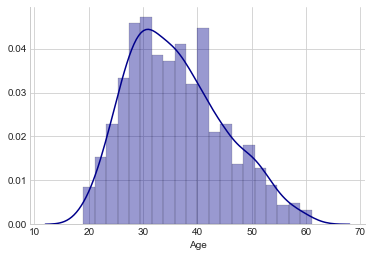

In [6]:
sns.set_style('whitegrid')
sns.set_palette("tab20")
sns.distplot(ad_data['Age'], bins=20, kde=True, color='darkblue', hist_kws=dict(edgecolor="k", linewidth=0.3))
sns.despine()

Vamos verificar se existe correlação entre a idade dos usuários e o salário médio anual de onde vivem.

C:\Users\claudio.souza\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\claudio.souza\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


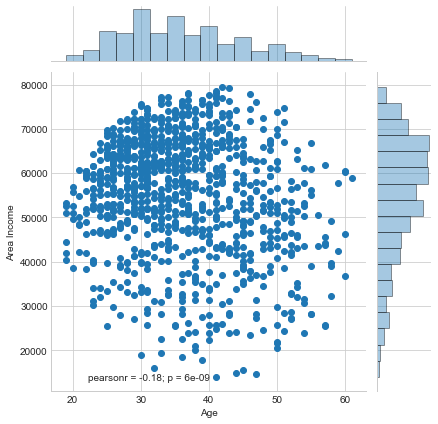

In [7]:
sns.set_palette('tab20')
sns.jointplot(data=ad_data,x='Age', y='Area Income')

Nesta visualização, conseguimos identificar um padrão: pessoas mais novas estão morando em áreas com maior poder aquisitivo.
___

Agora  vamos tentar identifica se a idade é influente no tempo de sessão no site. Vamos usar uma visualização diferente, onde os valores mais escuros representam uma maior concentração de dados.


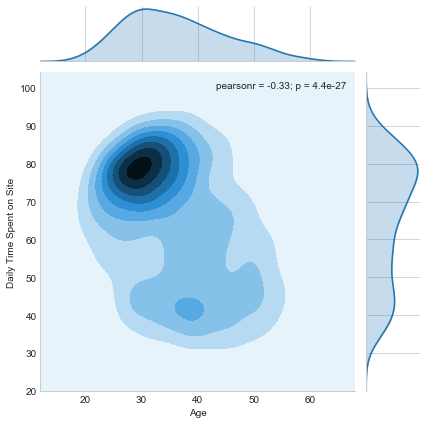

In [8]:
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site',kind="kde")

Coneguimos mais algumas informações relevantes. Conseguimos notar que a grande maioria dos nossos usuários passa em média 80 minutos no site e tem entre 28 e 35 anos.
___

Na próxima visualização, veremos algo mais básico. O tempo de uso de internet tem que papel no tempo dedicado ao nosso site?

C:\Users\claudio.souza\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\claudio.souza\Documents\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


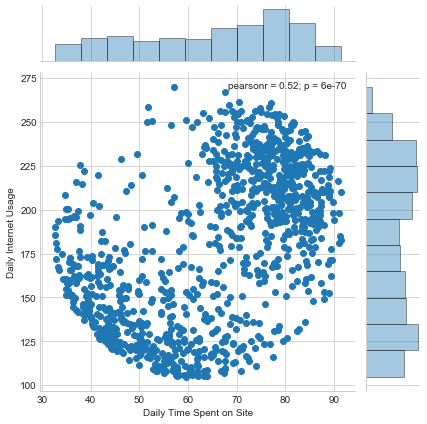

In [9]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', kind="scatter")

Como esperado, quando mais tempo se passa na internet, maior a probabilidade de se passar mais tempo no nosso website. 
___
Ultima visualização antes de aplicar nosso modelo de regressão logistica. Vamos procurar algum outro relacionamento que não exploramos anteriormente

/home/davi/miniconda3/envs/data/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/davi/miniconda3/envs/data/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


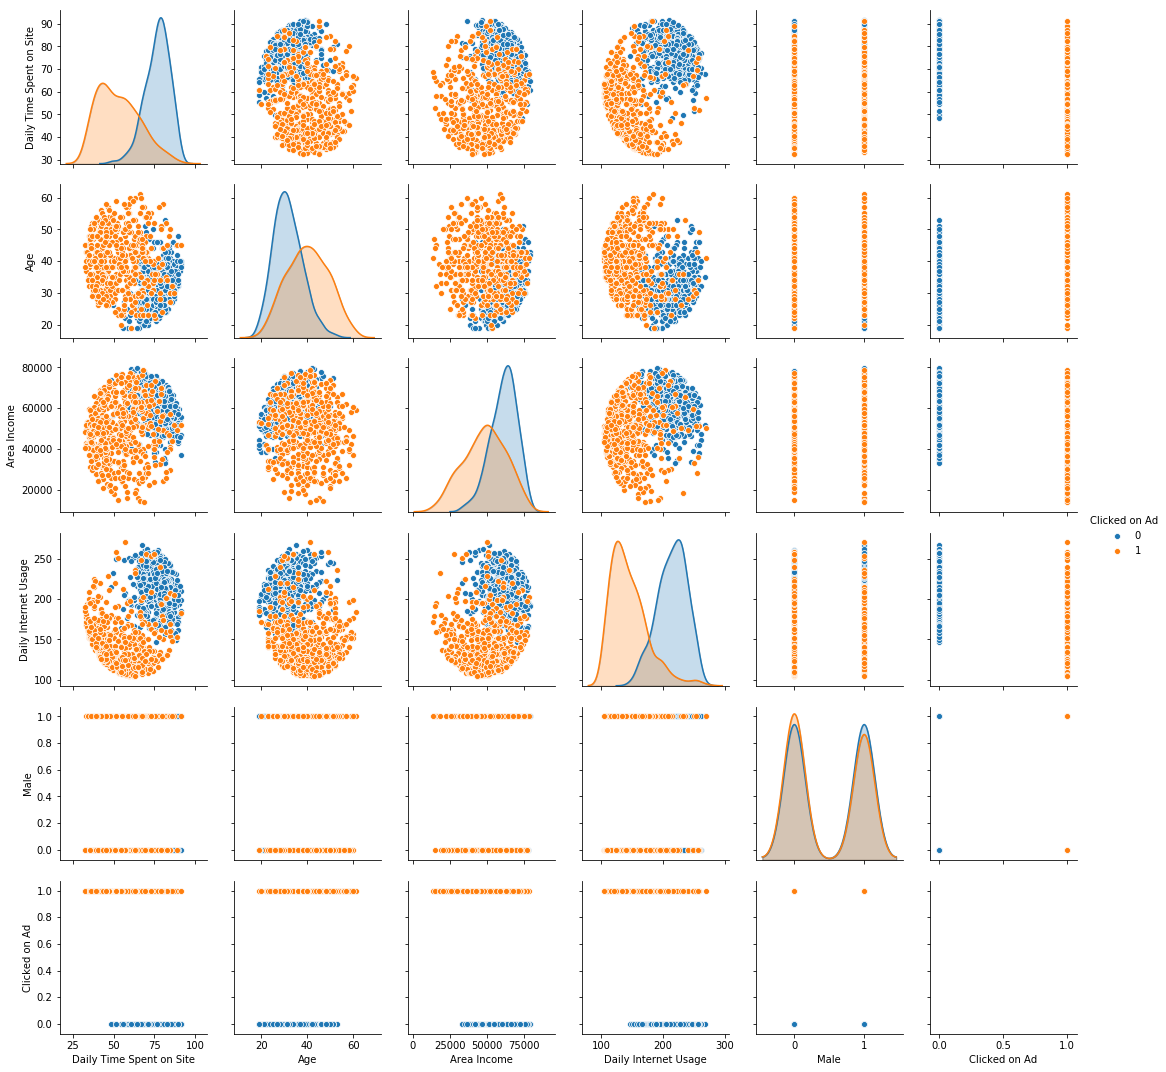

In [3]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='tab10')

Algumas informações relevantes aqui:
* Quem passa mais tempo no site tem mais chances de clicar em um AD
* Pessoas mais novas costumam clicar mais
* Pessoas que moram em áreas mais nobres clicam mais nos nossos ADs
* Não existe diferença notável entre público masculino e feminino.

# Regressão Logística

In [11]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Removendo colunas não numéricas

In [4]:
clean_ad_data = ad_data.drop(['Ad Topic Line','City', 'Country', 'Timestamp'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(clean_ad_data.drop('Clicked on Ad', axis=1), clean_ad_data['Clicked on Ad'], test_size=0.3, random_state=101)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predições e Avaliação do Modelo

In [13]:
test_predict = [[30,25,25000,240,1]]

In [14]:
logmodel.predict(test_predict)

array([0])

In [15]:
logmodel.predict_proba(test_predict)

array([[0.87510416, 0.12489584]])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



No artigo sobre Regressão Linear, utilizamos métricas como os coeficientes e o RMSE. Neste caso fica muito mais difícil utilizar essas métricas. Aqui vamos avaliar a precisão e o recall do nosso modelo.
Precisão é a proporção de verdadeiros positivos em todos os resultados positivos obtidos. A idéia é responder: Qual a proporção dos resultados positivos retornados não são falsos positivos?
O recall, por sua vez, responde a pergunta: Qual a proporção de verdadeiros positivos foi identificado corretamente? Nesta métrica, avaliamos em conjunto os falsos negativos.
